In [95]:
#import the library pandas 
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score
from sklearn.metrics.pairwise import cosine_similarity
import statsmodels.api as sm


In [96]:
#reading the dataset
df = pd.read_csv('dataset.csv')

In [97]:
#view the dataset
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.00,0.00,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0


In [98]:
#accounting the lines of the table
df.count()

Year                                  3065
Month                                 3065
Sector                                3065
Hydroelectric Power                   3065
Geothermal Energy                     3065
Solar Energy                          3065
Wind Energy                           3065
Wood Energy                           3065
Waste Energy                          3065
Fuel Ethanol, Excluding Denaturant    3065
Biomass Losses and Co-products        3065
Biomass Energy                        3065
Total Renewable Energy                3065
Renewable Diesel Fuel                 3065
Other Biofuels                        3065
Conventional Hydroelectric Power      3065
Biodiesel                             3065
dtype: int64

In [99]:
#describing the numeric columns
df.describe()

,Year,Month,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
count,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000
mean,1998.042414,6.491028,0.169759,1.146369,2.015008,4.282404,36.644408,5.820124,6.976648,4.834706,46.285969,70.872209,0.428949,0.031752,15.757374,0.953720
std,14.747378,3.456934,0.373819,1.550857,5.774511,18.124793,46.900639,8.247359,21.911920,15.601717,64.241520,71.197761,2.687850,0.258149,32.134059,3.985003
min,1973.000000,1.000000,-0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1985.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.483000,0.000000,0.000000,0.000000,0.258000,2.070000,0.000000,0.000000,0.000000,0.000000
50%,1998.000000,6.000000,0.000000,0.357000,0.004000,0.000000,12.062000,0.108000,0.007000,0.000000,9.716000,50.984000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,9.000000,0.036000,1.673000,0.774000,0.001000,51.808000,12.764000,1.283000,0.000000,89.359000,126.982000,0.000000,0.000000,0.000000,0.000000
max,2024.000000,12.000000,2.047000,5.951000,64.040000,157.409000,183.628000,32.875000,104.420000,75.373000,233.200000,308.175000,38.344000,4.101000,117.453000,27.871000


In [100]:
#informations of the table (columns)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                3065 non-null   int64  
 1   Month                               3065 non-null   int64  
 2   Sector                              3065 non-null   object 
 3   Hydroelectric Power                 3065 non-null   float64
 4   Geothermal Energy                   3065 non-null   float64
 5   Solar Energy                        3065 non-null   float64
 6   Wind Energy                         3065 non-null   float64
 7   Wood Energy                         3065 non-null   float64
 8   Waste Energy                        3065 non-null   float64
 9   Fuel Ethanol, Excluding Denaturant  3065 non-null   float64
 10  Biomass Losses and Co-products      3065 non-null   float64
 11  Biomass Energy                      3065 no

In [101]:
#discovering the types of the variables
df.dtypes

Year                                    int64
Month                                   int64
Sector                                 object
Hydroelectric Power                   float64
Geothermal Energy                     float64
Solar Energy                          float64
Wind Energy                           float64
Wood Energy                           float64
Waste Energy                          float64
Fuel Ethanol, Excluding Denaturant    float64
Biomass Losses and Co-products        float64
Biomass Energy                        float64
Total Renewable Energy                float64
Renewable Diesel Fuel                 float64
Other Biofuels                        float64
Conventional Hydroelectric Power      float64
Biodiesel                             float64
dtype: object

In [102]:
def sectors():
    list_energy = []
    list_year = []
    list_month = []
    list_day = []
    dict_df = {}
    for year in range(1973,2025):
        for month in range(1,13):
            list_month.append(month)
            df_ = df[(df['Year'] == year) & (df['Month'] == month)][['Year','Month','Sector','Total Renewable Energy']]
            list_year.append(year)
            list_day.append(26)
            sum_energy = df_['Total Renewable Energy'].sum()
            list_energy.append(f'{sum_energy:.3f}')
    dict_df = {'Year': list_year,'Month':list_month,'Day':list_day,'Total Renewable Energy':list_energy}
    return dict_df

In [103]:

df = pd.read_csv('dataset.csv')

dataAll = sectors()

dataFrame_process = pd.DataFrame(dataAll)
dataFrame_process['Total Renewable Energy'] = dataFrame_process['Total Renewable Energy'].astype(float)

dataFrame_process['Data Time'] = pd.to_datetime(dataFrame_process[['Year','Month','Day']])
dataFrame_process = dataFrame_process[dataFrame_process['Total Renewable Energy'] != 0.000]

dataFrame_process.to_csv('data_per_month.csv', index=False)

dataFrame_process.dtypes
print(dataFrame_process.columns)
print(dataFrame_process)

Index(['Year', 'Month', 'Day', 'Total Renewable Energy', 'Data Time'], dtype='object')
     Year  Month  Day  Total Renewable Energy  Data Time
0    1973      1   26                 219.840 1973-01-26
1    1973      2   26                 197.330 1973-02-26
2    1973      3   26                 218.687 1973-03-26
3    1973      4   26                 209.330 1973-04-26
4    1973      5   26                 215.982 1973-05-26
..    ...    ...  ...                     ...        ...
608  2023      9   26                 499.536 2023-09-26
609  2023     10   26                 532.762 2023-10-26
610  2023     11   26                 519.638 2023-11-26
611  2023     12   26                 533.819 2023-12-26
612  2024      1   26                 521.761 2024-01-26

[613 rows x 5 columns]


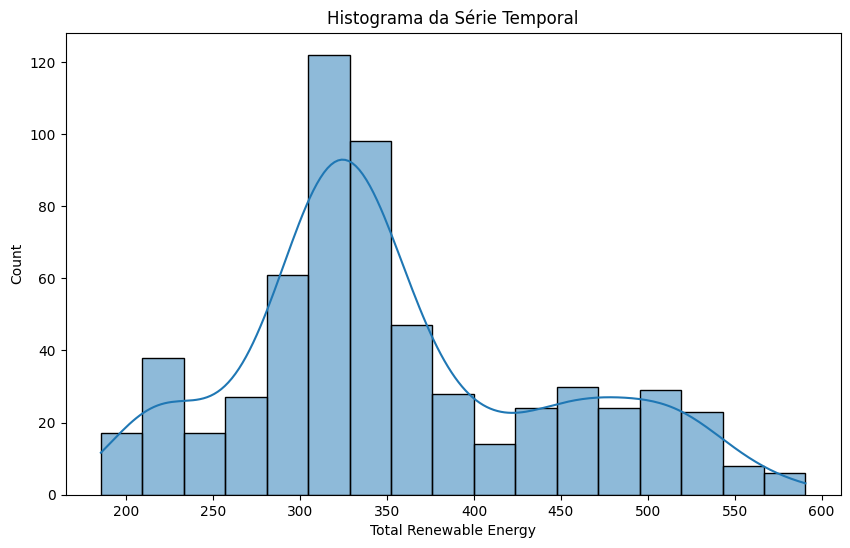

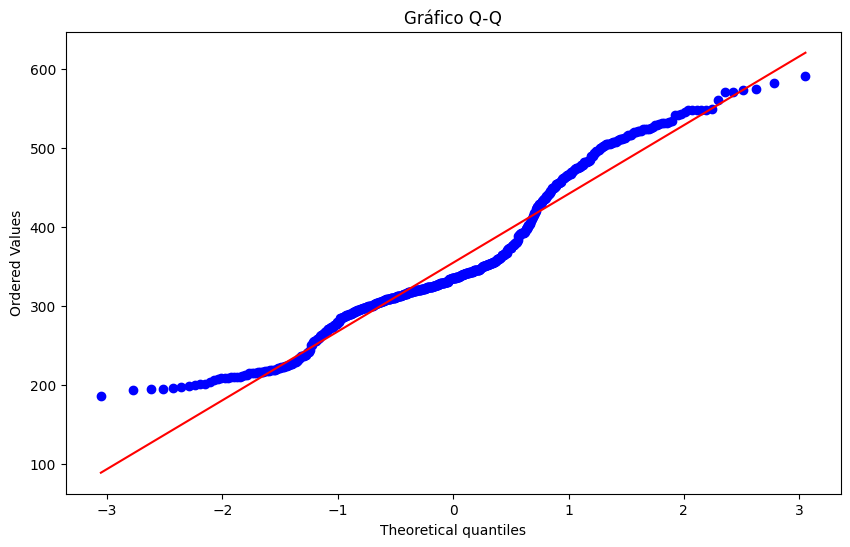

Shapiro-Wilk Teste
Estatística: 0.9481498124206729
Valor-p: 7.851643982381795e-14

Teste de Kolmogorov-Smirnov
Estatística: 1.0
Valor-p: 0.0

Teste de Anderson-Darling
Estatística: 13.02325552539719
Valores Críticos: [0.572 0.652 0.782 0.912 1.085]
Resultado: [15.  10.   5.   2.5  1. ]


In [104]:

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(dataFrame_process['Total Renewable Energy'], kde=True)
plt.title('Histograma da Série Temporal')
plt.show()

# Gráfico Q-Q
plt.figure(figsize=(10, 6))
stats.probplot(dataFrame_process['Total Renewable Energy'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q')
plt.show()

# Teste de Shapiro-Wilk
shapiro_test = stats.shapiro(dataFrame_process['Total Renewable Energy'])
print('Shapiro-Wilk Teste')
print('Estatística:', shapiro_test.statistic)
print('Valor-p:', shapiro_test.pvalue)

# Teste de Kolmogorov-Smirnov
ks_test = stats.kstest(dataFrame_process['Total Renewable Energy'], 'norm')
print('\nTeste de Kolmogorov-Smirnov')
print('Estatística:', ks_test.statistic)
print('Valor-p:', ks_test.pvalue)

# Teste de Anderson-Darling
ad_test = stats.anderson(dataFrame_process['Total Renewable Energy'], dist='norm')
print('\nTeste de Anderson-Darling')
print('Estatística:', ad_test.statistic)
print('Valores Críticos:', ad_test.critical_values)
print('Resultado:', ad_test.significance_level)


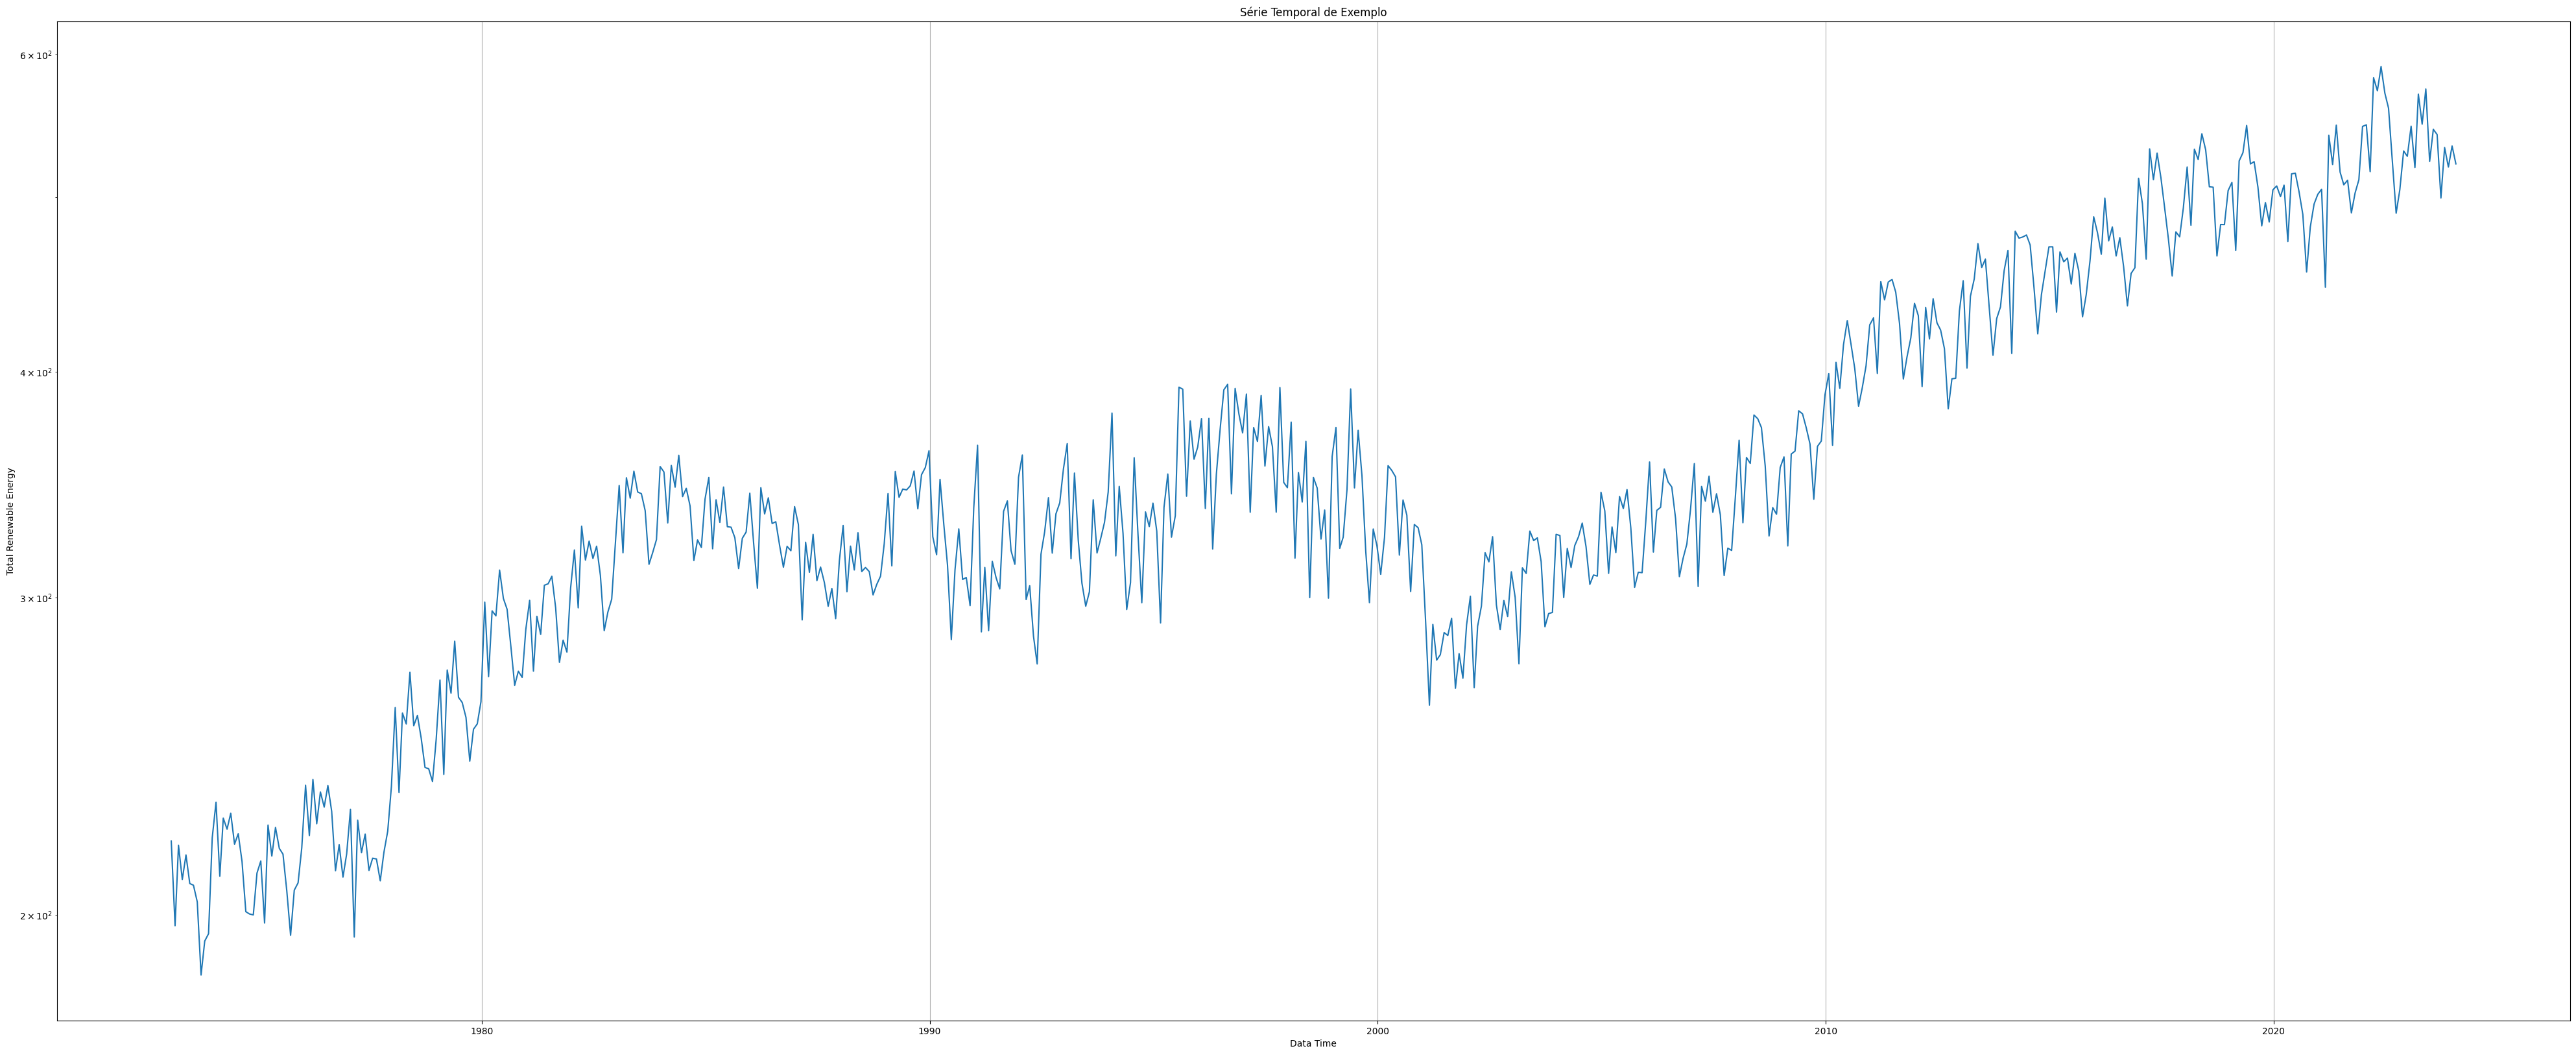

In [105]:
# Plotar a série temporal
plt.figure(figsize=(50, 20))
plt.plot(dataFrame_process["Data Time"], dataFrame_process['Total Renewable Energy'])
plt.title('Série Temporal de Exemplo')
plt.xlabel('Data Time')
plt.ylabel('Total Renewable Energy')
plt.grid(True)
plt.yscale("log")
plt.show()



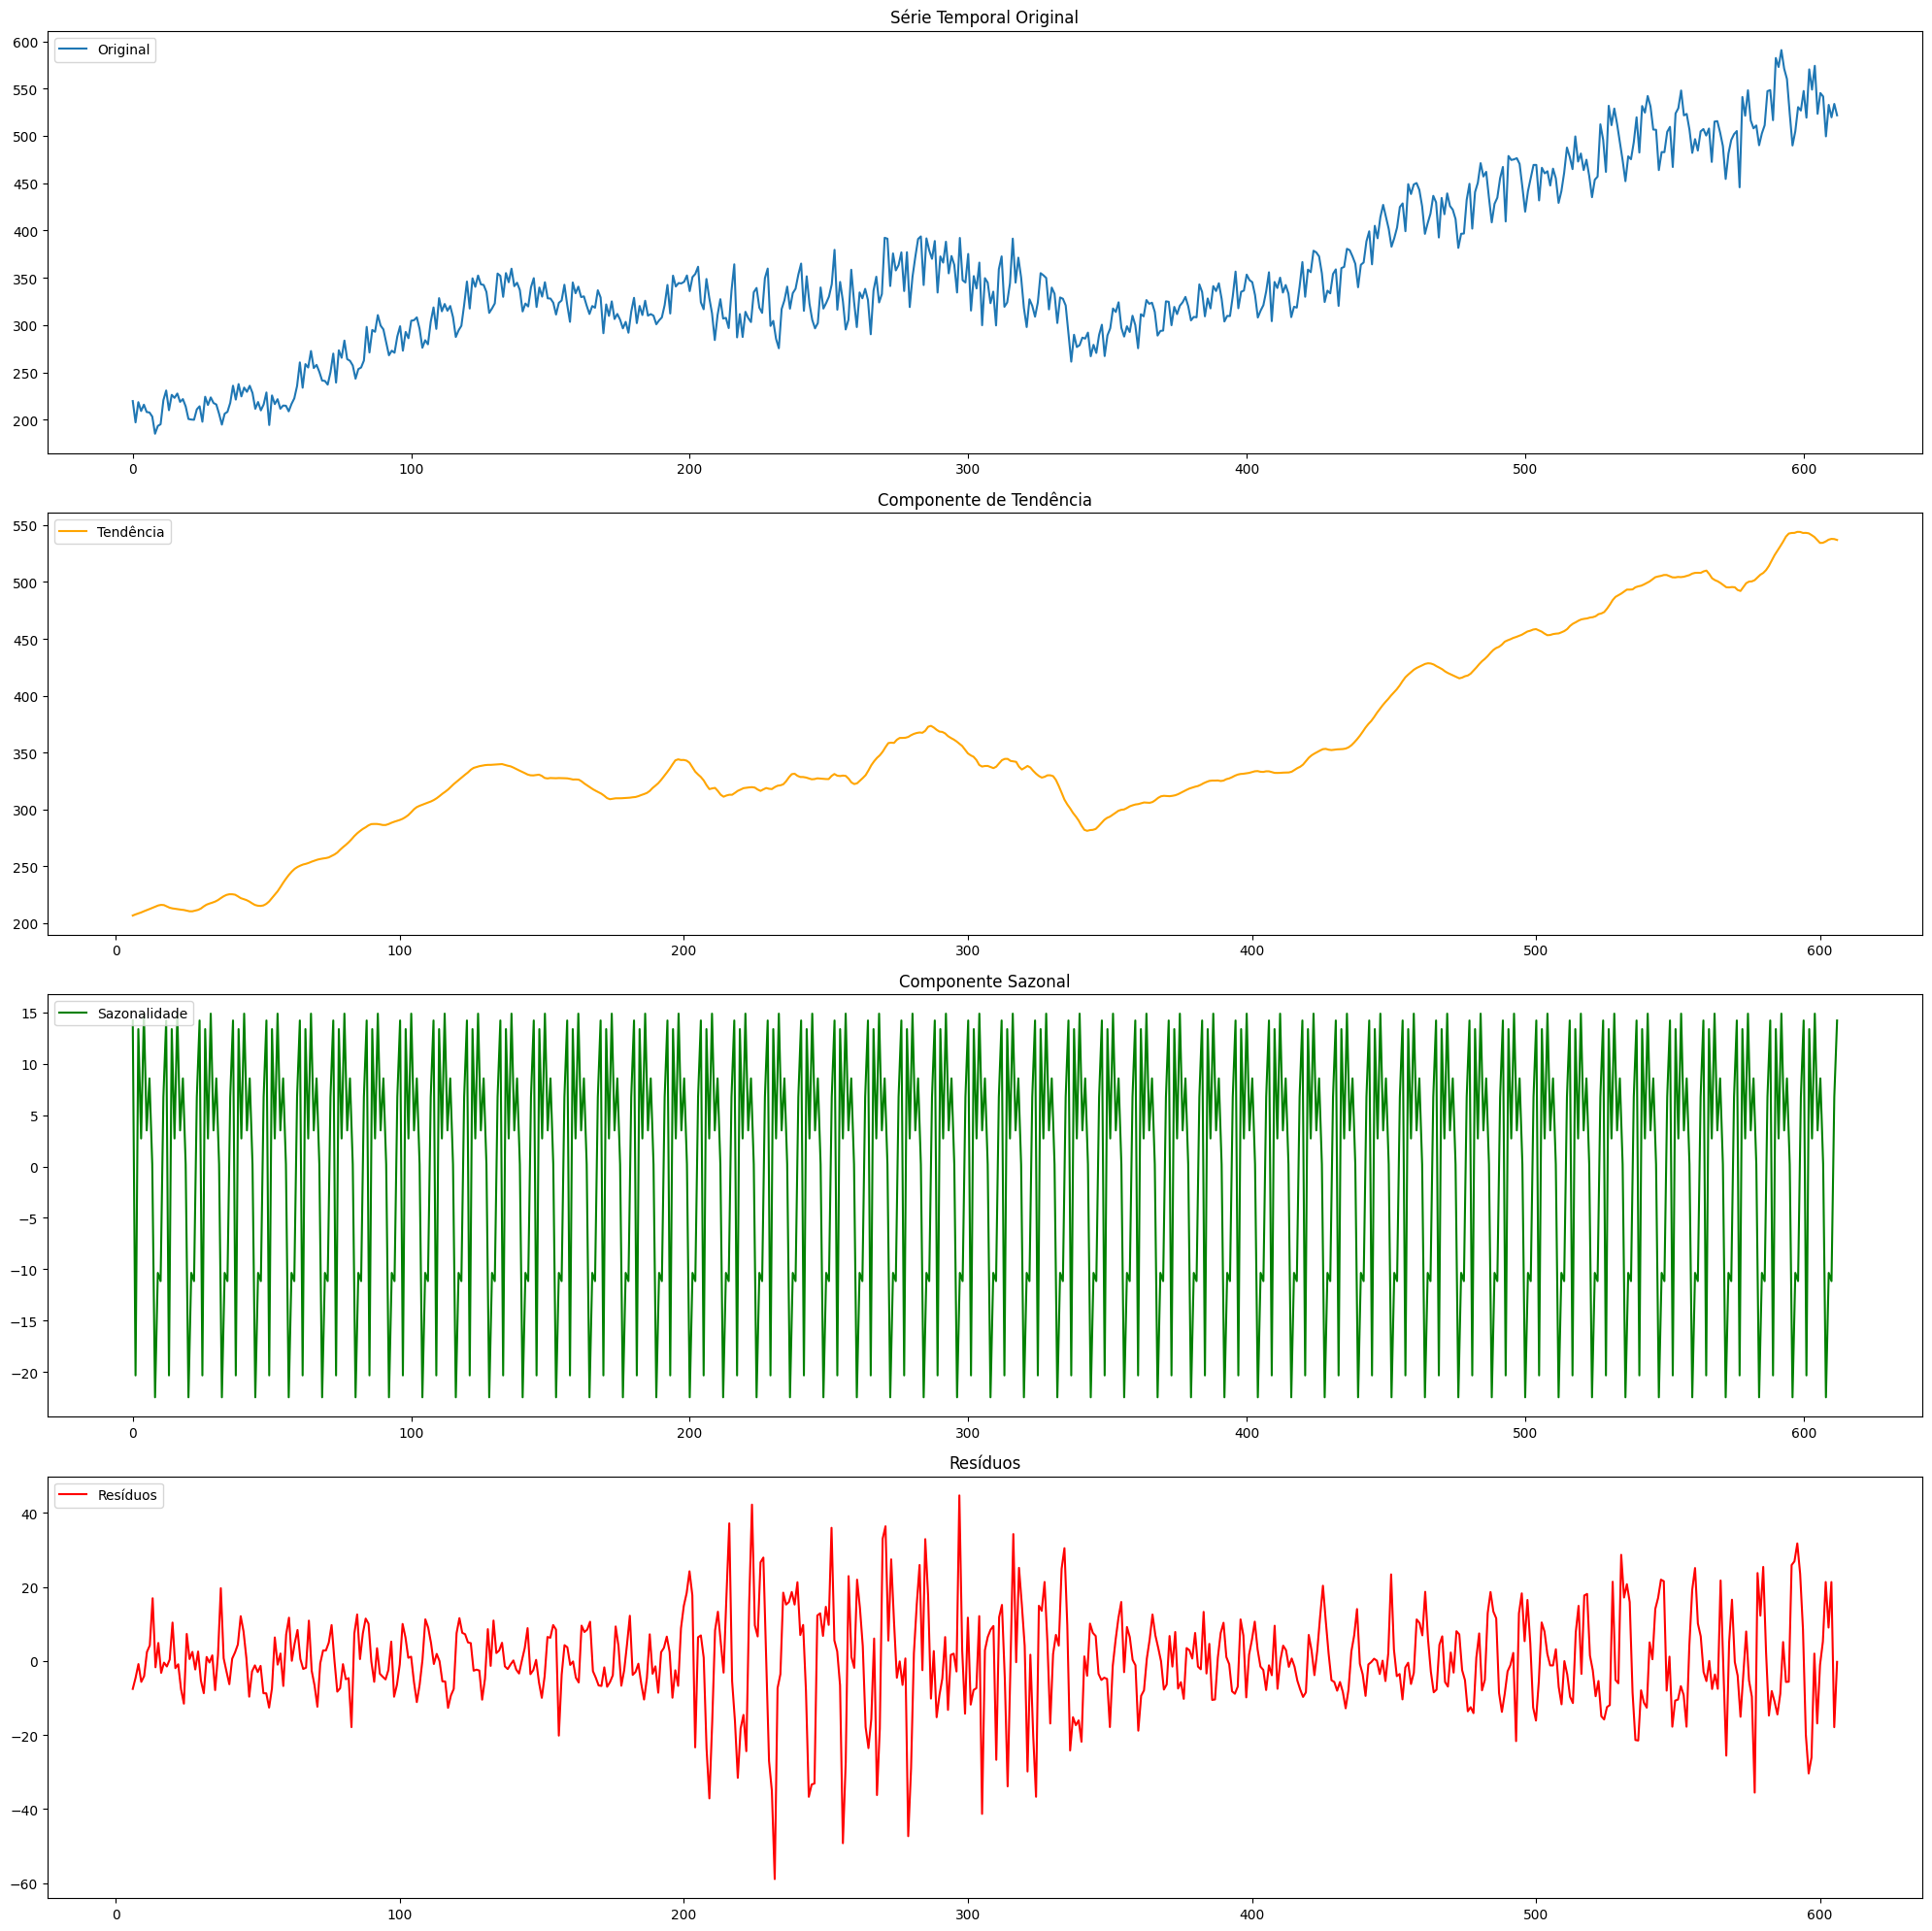

In [106]:
# Decompondo a série temporal
decomposicao = seasonal_decompose(dataFrame_process['Total Renewable Energy'], model='additive', period=12)  # 'period=12' para sazonalidade anual # Talvez mudar sazonalidade?

# Plotando os componentes
plt.figure(figsize=(20, 20))

plt.subplot(411)
plt.plot(dataFrame_process['Total Renewable Energy'], label='Original')
plt.legend(loc='upper left')
plt.title('Série Temporal Original')

plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência', color='orange')
plt.legend(loc='upper left')
plt.title('Componente de Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal, label='Sazonalidade', color='green')
plt.legend(loc='upper left')
plt.title('Componente Sazonal')

plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos', color='red')
plt.legend(loc='upper left')
plt.title('Resíduos')

plt.tight_layout()
plt.show()


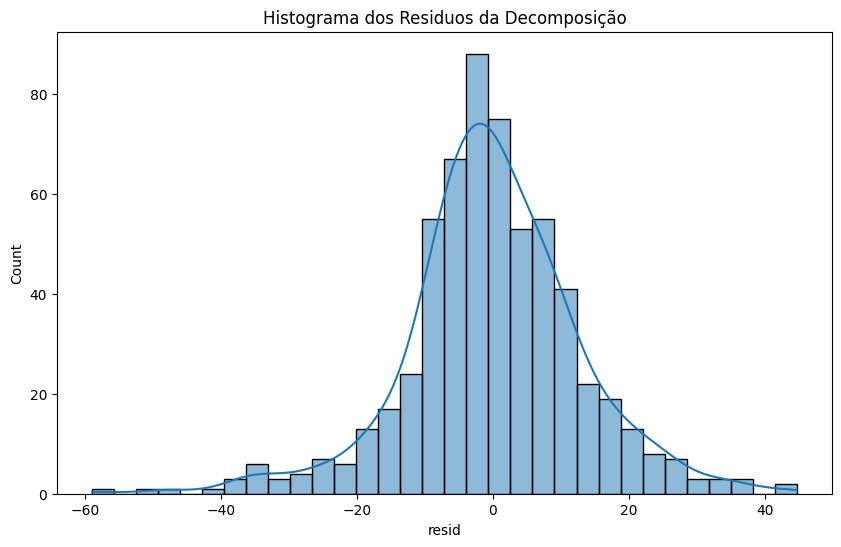

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(decomposicao.resid, kde=True)
plt.title('Histograma dos Residuos da Decomposição')
plt.show()

In [108]:
np.mean(decomposicao.resid)


0.012056736111130473

In [109]:
np.std(decomposicao.resid)

12.904094420434747

In [110]:
data = dataFrame_process['Total Renewable Energy']
# Executar o teste ADF na série original
result = adfuller(data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -0.3476306025138657
p-value: 0.9184822690134047


0      5.392900
1      5.284877
2      5.387641
3      5.343912
4      5.375195
         ...   
608    6.213680
609    6.278075
610    6.253132
611    6.280057
612    6.257210
Name: Total Renewable Energy, Length: 613, dtype: float64


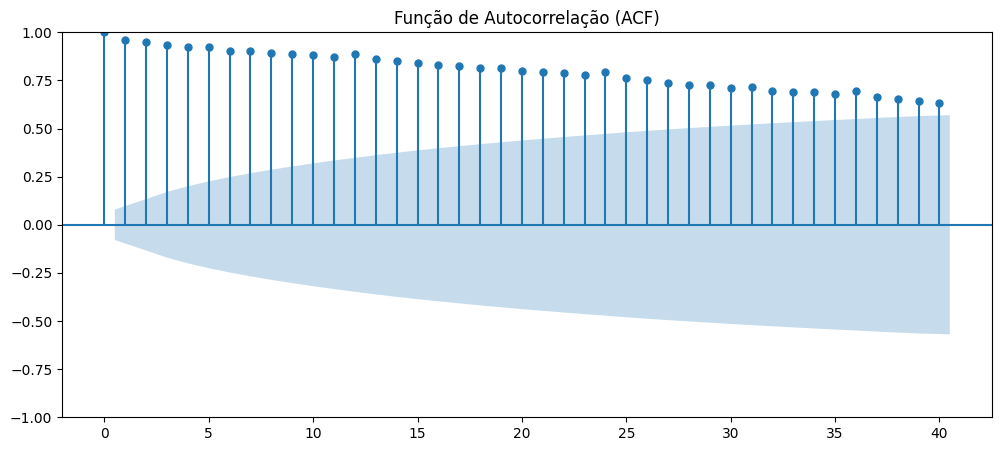

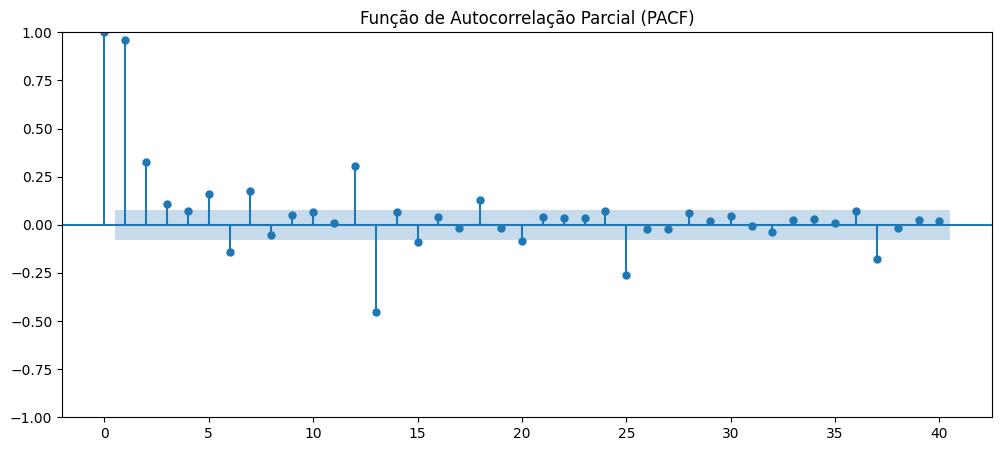

In [111]:
# Suponha que você tenha uma série temporal de dados chamada 'data'
data = dataFrame_process['Total Renewable Energy']

# Transformação Logarítmica
log_data = np.log(data)

# Verificando a série transformada
print(log_data)

#ACF E PACF ANTES DA PADRONIZAÇÃO DOS DADOS

# Plotar a função de autocorrelação (ACF)
plt.figure(figsize=(12, 5))
plot_acf(log_data, lags=40, ax=plt.gca())
plt.title('Função de Autocorrelação (ACF)')
plt.show()

# Plotar a função de autocorrelação parcial (PACF)
plt.figure(figsize=(12, 5))
plot_pacf(log_data, lags=40, ax=plt.gca())
plt.title('Função de Autocorrelação Parcial (PACF)')
plt.show()

In [112]:
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error

# Carregue os seus dados (por exemplo, em um DataFrame do pandas)
# Aqui eu assumo que você tem uma série temporal 'ts_data'

# Divida os dados em conjunto de treinamento e teste
train, test = model_selection.train_test_split(log_data, test_size=0.2)

# Ajuste o modelo ARIMA automaticamente
modelo_arima = pm.auto_arima(train, 
                             seasonal=True, # Use sazonalidade
                             m=12, # O valor 's' que representa a sazonalidade (por exemplo, 12 para dados mensais)
                             trace=True, # Para imprimir o progresso do ajuste
                             error_action='ignore', # Ignorar erros para continuar o processo
                             suppress_warnings=True, # Suprimir avisos
                             stepwise=True) # Usar algoritmo stepwise para encontrar os melhores parâmetros

# Resumo do modelo
print(modelo_arima.summary())


# Faça previsões com o modelo ajustado
previsoes = modelo_arima.predict(n_periods=len(test))

# Avaliar o desempenho do modelo
print("Mean Squared Error:", mean_squared_error(test, previsoes))

import matplotlib.pyplot as plt
import numpy as np

# Suponha que você tenha suas previsões e os valores reais em dois arrays ou listas
# Aqui, 'train' são os dados reais usados para treinar o modelo e 'test' são os dados reais para validação
# 'previsoes' são as previsões feitas pelo modelo

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-1712.812, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-1247.047, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-1583.481, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-1500.378, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-1248.847, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-1505.957, Time=0.65 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-1619.000, Time=0.69 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-1709.935, Time=1.89 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-1709.109, Time=1.73 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-1382.185, Time=0.30 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-1563.199, Time=1.64 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-1674.904, Time=1.59 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=-1715.339, Time=1.87 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=-1718.228, Time=1.84 sec
 ARIM

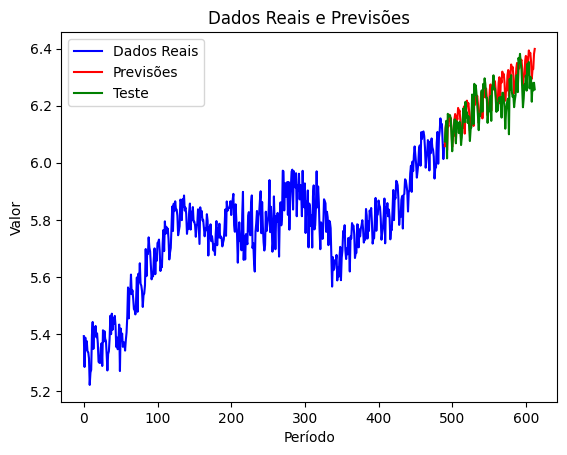

In [113]:
dados_completos = np.concatenate([train])
indice_tempo = np.arange(len(dados_completos))
indice_previsoes = np.arange(len(train), len(train) + len(previsoes))

# Plotar os dados reais (azul) e as previsões (vermelho)
plt.plot(indice_tempo, dados_completos, label='Dados Reais', color='blue')
plt.plot(indice_previsoes, previsoes, label='Previsões', color='red')
plt.plot(indice_previsoes, test, label='Teste', color='green')

#plt.figure(figsize=(40, 20))
plt.xlabel('Período')
plt.ylabel('Valor')
plt.legend()
plt.title('Dados Reais e Previsões')
plt.show()

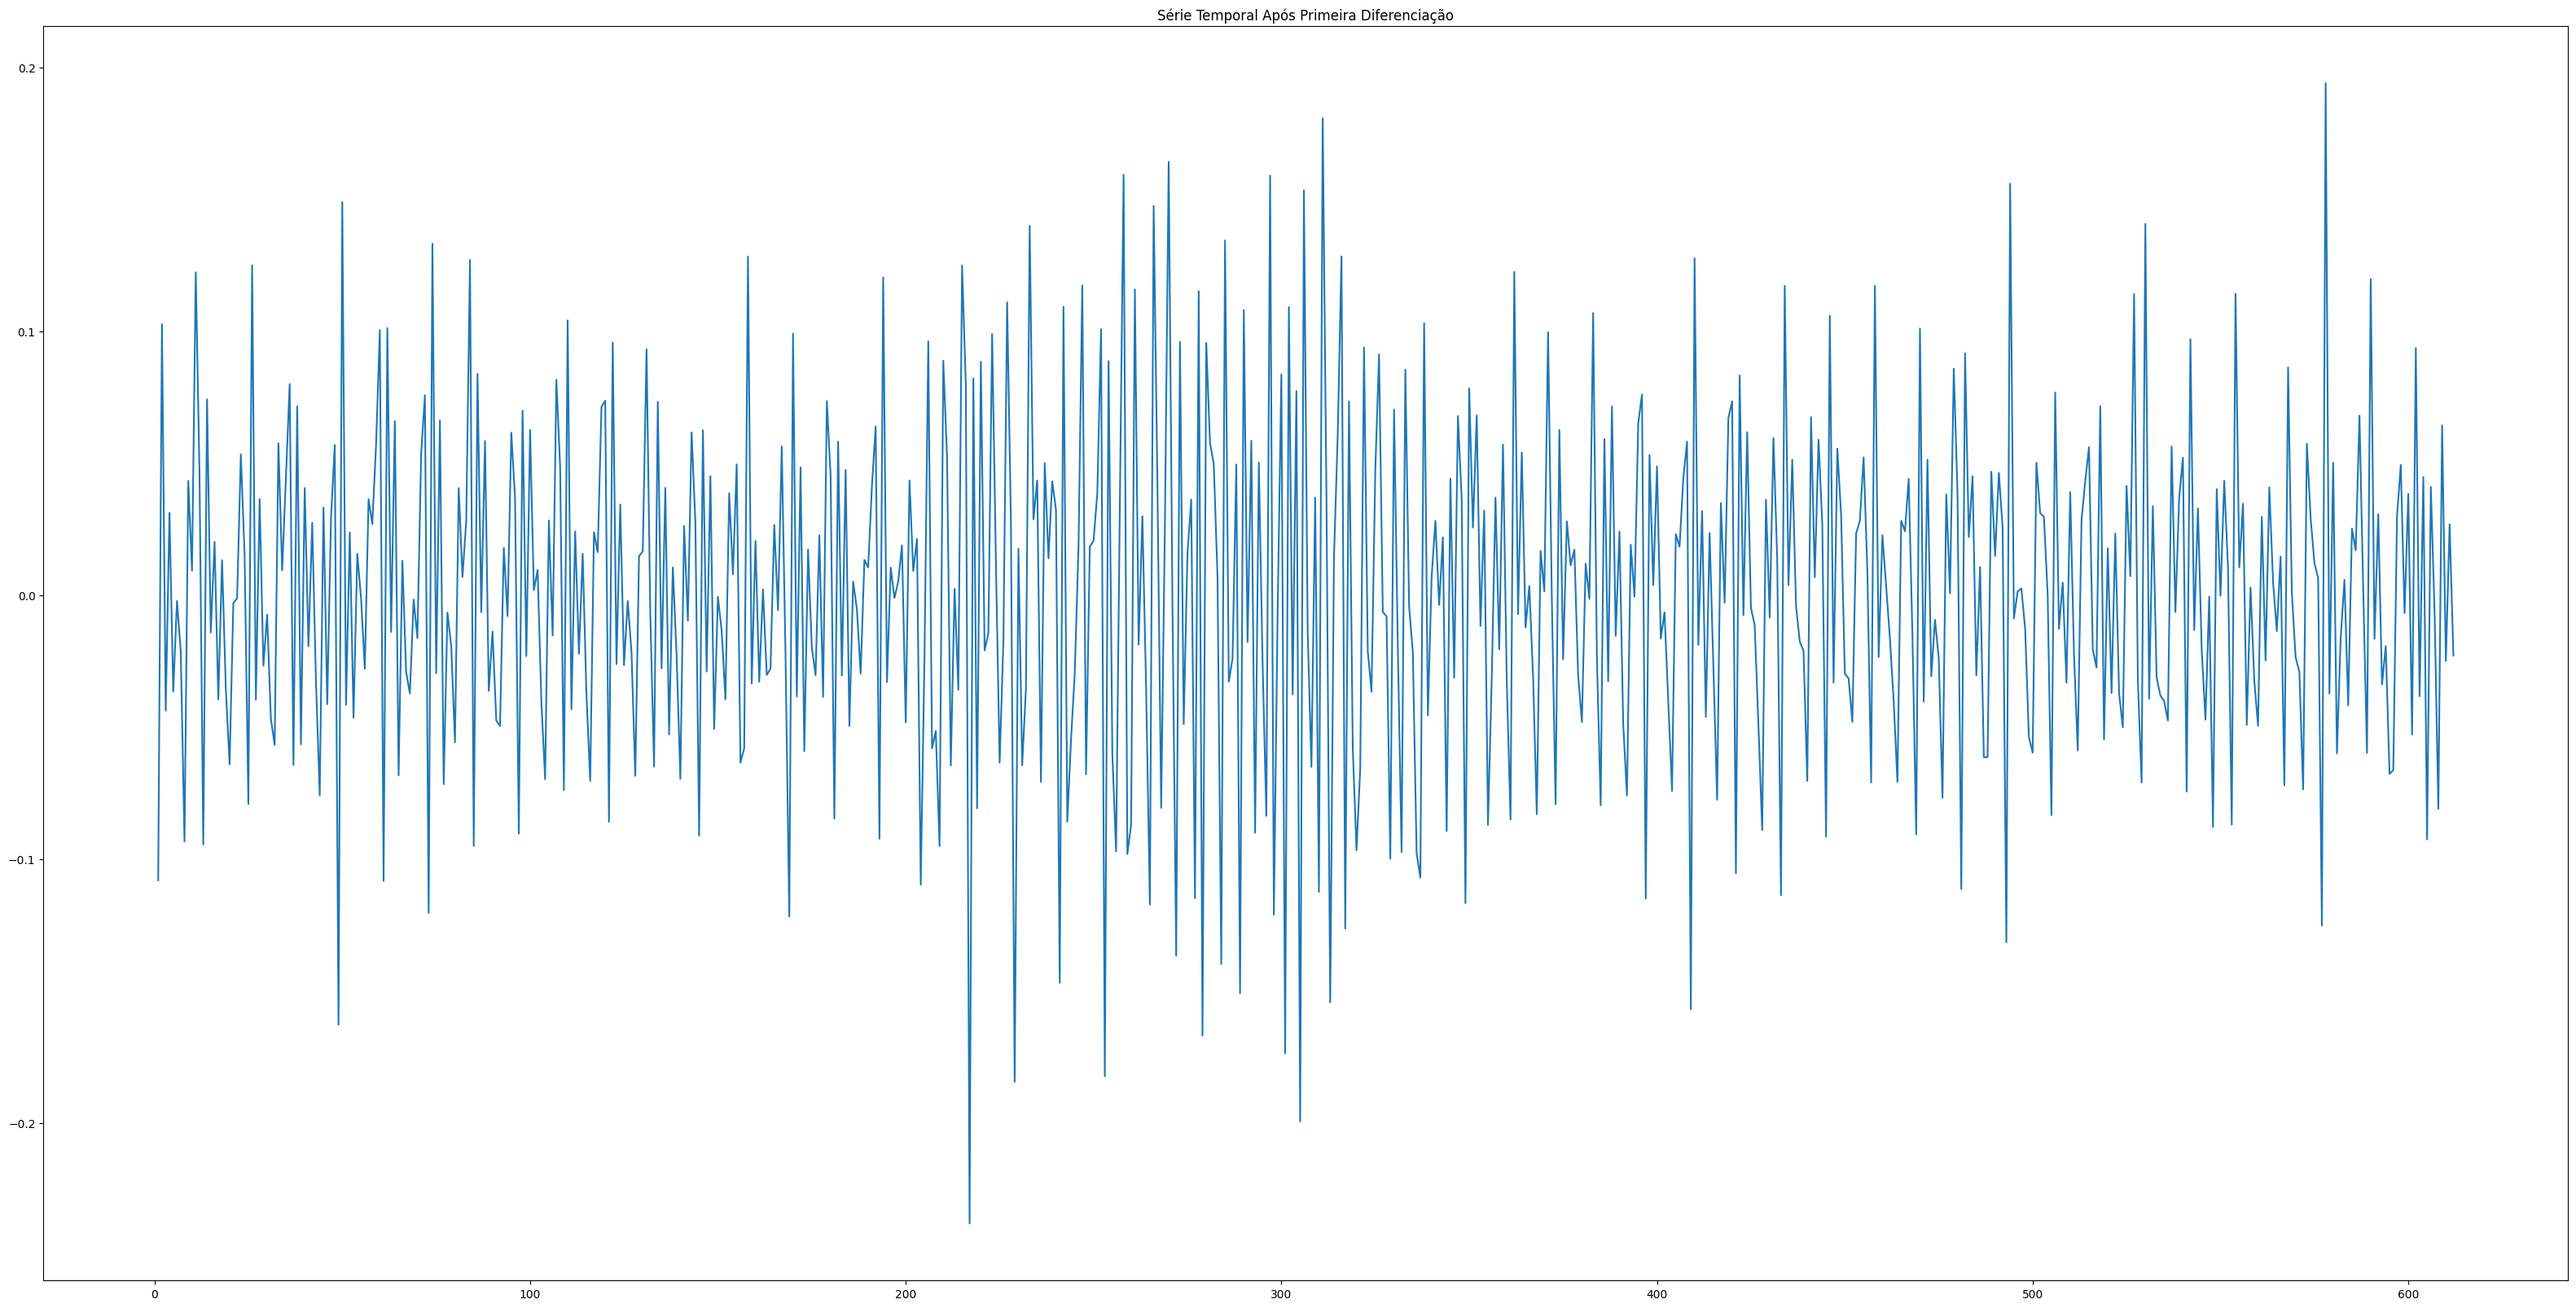

ADF Statistic: -6.850250011870762
p-value: 1.7015061255280695e-09
1     -0.108023
2      0.102764
3     -0.043730
4      0.031283
5     -0.036461
         ...   
608   -0.080959
609    0.064395
610   -0.024942
611    0.026924
612   -0.022847
Name: Total Renewable Energy, Length: 612, dtype: float64


In [114]:
# Aplicar a primeira diferenciação
initial_value = log_data.loc[0]
data_diff1 = log_data.diff().dropna()

# Plotar a série diferenciada
plt.figure(figsize=(40, 20))
plt.plot(data_diff1)
plt.title('Série Temporal Após Primeira Diferenciação')
plt.show()

# Executar o teste ADF na série diferenciada
result_diff1 = adfuller(data_diff1)
print('ADF Statistic:', result_diff1[0])
print('p-value:', result_diff1[1])

print(data_diff1)

                                 SARIMAX Results                                  
Dep. Variable:     Total Renewable Energy   No. Observations:                  612
Model:                     ARIMA(0, 0, 2)   Log Likelihood                 885.468
Date:                    Fri, 14 Feb 2025   AIC                          -1762.935
Time:                            10:02:41   BIC                          -1745.268
Sample:                                 0   HQIC                         -1756.064
                                    - 612                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.001      2.234      0.025       0.000       0.003
ma.L1         -0.5855      0.040    -14.600      0.000      -0.664      -0.507
ma.L2         -0.124

C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, 

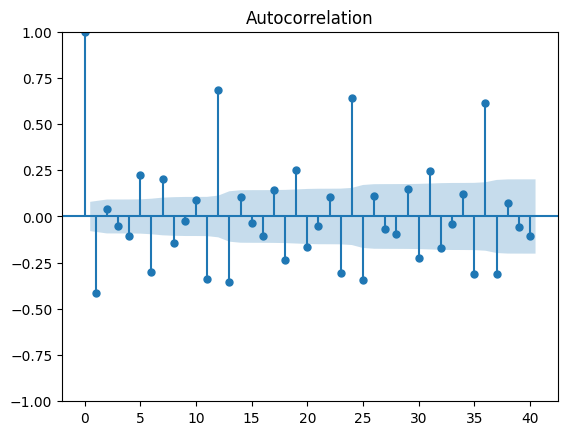

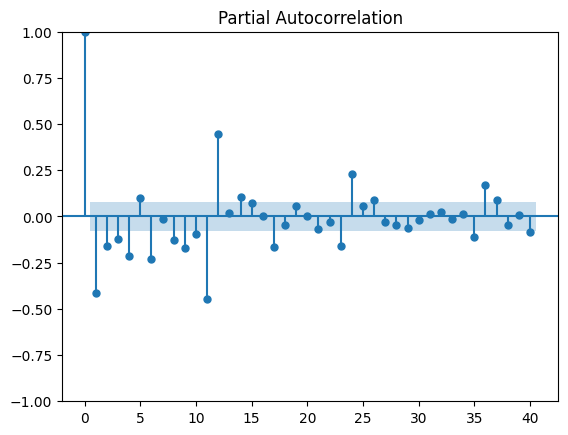

In [115]:
#Usando ARIMA-GARCH antes da padronização dos dados

from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(data_diff1, order=(0, 0, 2))
results_arima = model_arima.fit()

print(results_arima.summary())

residuals_arima = results_arima.resid

model_garch = arch_model(residuals_arima, vol='GARCH', p=1, q=1)
results_garch = model_garch.fit()
# print(results_garch.summary())


# Resíduos padronizados
std_resid = results_garch.resid / results_garch.conditional_volatility

# Teste de Ljung-Box nos resíduos ao quadrado
ljung_box = sm.stats.acorr_ljungbox(std_resid**2, lags=[10], return_df=True)
print(ljung_box)

# Teste de Engle para efeitos ARCH
arch_test = sm.stats.diagnostic.het_arch(std_resid)
print('Teste de Engle para efeitos ARCH:', arch_test)

# Plot ACF e PACF dos resíduos ao quadrado
sm.graphics.tsa.plot_acf(data_diff1, lags=40)
sm.graphics.tsa.plot_pacf(data_diff1, lags=40)
plt.show()


C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge

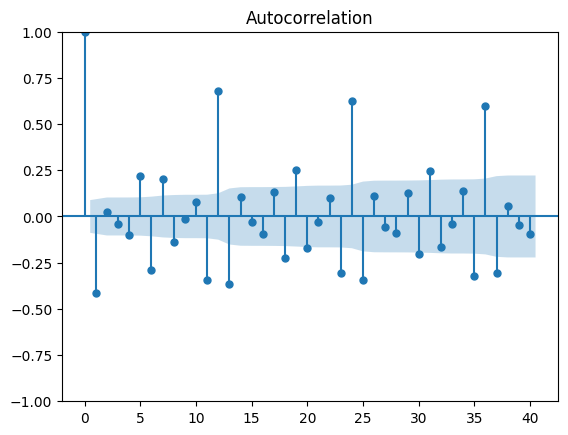

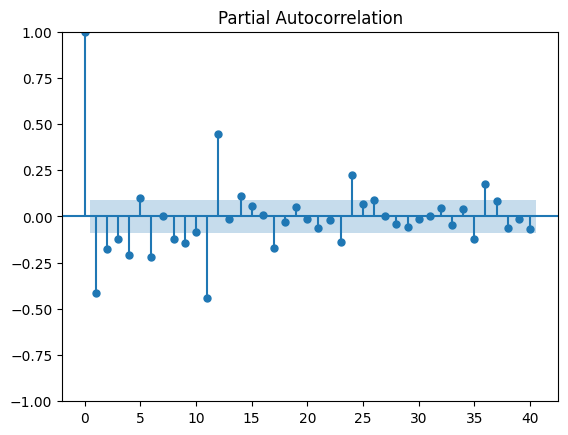

490    0.014893
491    0.046367
492    0.025750
493   -0.131521
494    0.156018
         ...   
608   -0.080959
609    0.064395
610   -0.024942
611    0.026924
612   -0.022847
Name: Total Renewable Energy, Length: 123, dtype: float64


C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


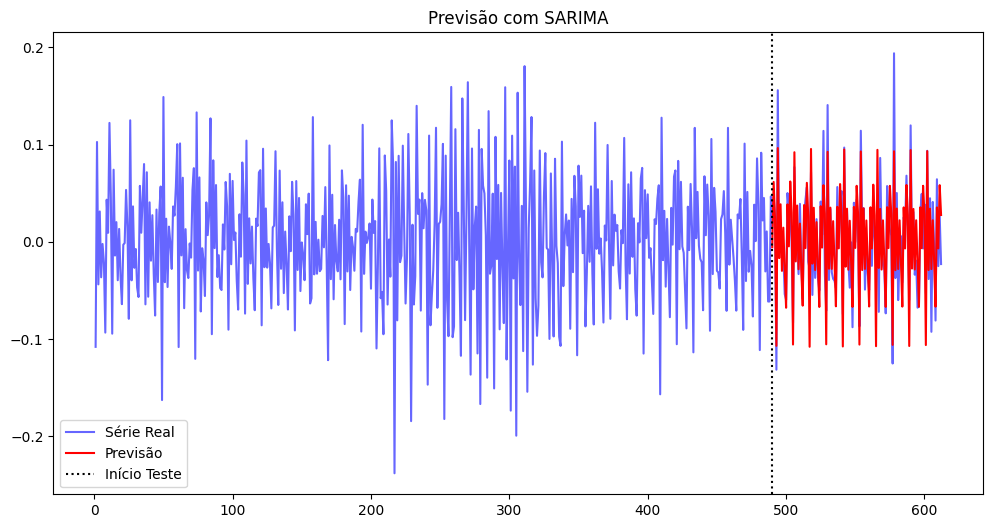

In [149]:
#Ajustando o modelo SARIMA antes de padronizar os dados

# Suponha que 'data_diff1' seja sua série diferenciada
train_size = int(len(data_diff1) * 0.8)  # 80% treino, 20% teste
train, test = data_diff1[:train_size], data_diff1[train_size:]

# Criar e treinar o modelo com os dados de treino
model = SARIMAX(train, order=(3, 1, 2), seasonal_order=(3, 1, 2, 12))
result = model.fit()

sm.graphics.tsa.plot_acf(train, lags=40)
sm.graphics.tsa.plot_pacf(train, lags=40)
plt.show()

print(test)

# Fazer previsões
forecast = result.predict(start=len(train), end=len(data_diff1) - 1, dynamic=False)

plt.figure(figsize=(12, 6))

plt.plot(data_diff1.index, data_diff1, label="Série Real", color='blue', alpha=0.6)
plt.plot(test.index, forecast, label="Previsão", color='red')

plt.axvline(data_diff1.index[train_size], color='black', linestyle="dotted", label="Início Teste")
plt.title("Previsão com SARIMA")
plt.legend()
plt.show()

MAE: 0.04119057823342491
MSE: 0.0028848579364308385
RMSE: 0.053710873540008995
R²: 0.6438763838076129
Similaridade de Cossenos: 0.999335046647555


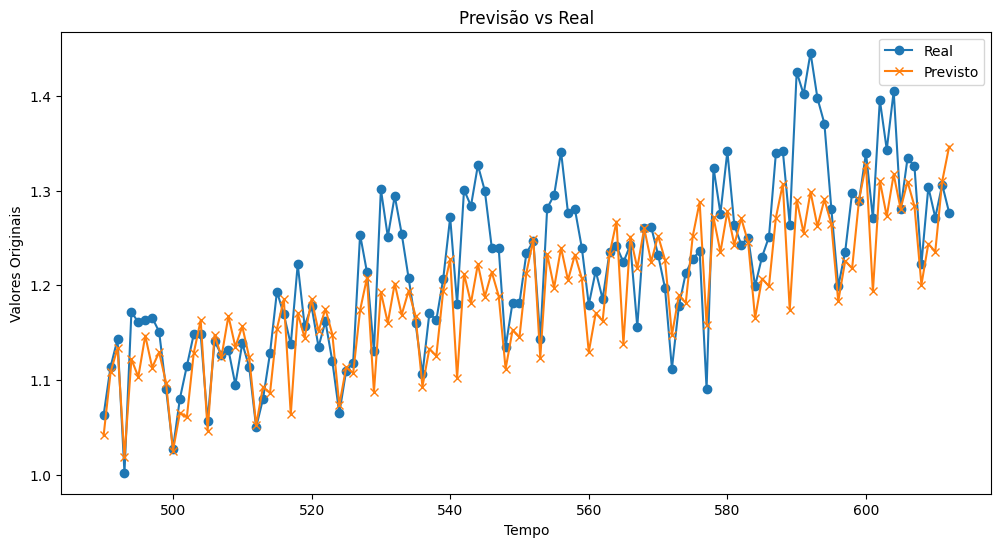

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Reverter a diferenciação
test_reversed = np.r_[data_diff1.iloc[train_size - 1], test].cumsum()[1:]
forecast_reversed = np.r_[data_diff1.iloc[train_size - 1], forecast].cumsum()[1:]

# Reverter a transformação logarítmica
test_original = np.exp(test_reversed)
forecast_original = np.exp(forecast_reversed)

# Ajustar o tamanho do índice
test_index = test.index[-len(test_original):]
forecast_index = test.index[-len(forecast_original):]

test_original = pd.Series(test_original, index=test_index)
forecast_original = pd.Series(forecast_original, index=forecast_index)

# Garantir que as dimensões são iguais
min_length = min(len(test_original), len(forecast_original))
test_original = test_original.iloc[:min_length]
forecast_original = forecast_original.iloc[:min_length]

# Calcular métricas de erro
mae = mean_absolute_error(test_original, forecast_original)
mse = mean_squared_error(test_original, forecast_original)
rmse = np.sqrt(mse)
r2 = r2_score(test_original, forecast_original)

# Calcular Similaridade de Cossenos
cosine_sim = cosine_similarity(test_original.values.reshape(1, -1), forecast_original.values.reshape(1, -1))[0, 0]

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"Similaridade de Cossenos: {cosine_sim}")

# Visualizar previsões vs dados reais
plt.figure(figsize=(12, 6))
plt.plot(test_original.index, test_original, label='Real', marker='o')
plt.plot(forecast_original.index, forecast_original, label='Previsto', marker='x')
plt.xlabel('Tempo')
plt.ylabel('Valores Originais')
plt.title('Previsão vs Real')
plt.legend()
plt.show()


In [ ]:
# #Divisão de dados para treino e teste com dados padronizados

# train_size = int(len(data_diff1) * 0.8)
# print(train_size)

# train_data = data_diff1[:train_size]
# test_data = data_diff1[train_size:]

# coluna_seriesTrain = train_data
# coluna_Traindf = coluna_seriesTrain.to_frame()

# coluna_seriesTest = test_data
# coluna_Testdf = coluna_seriesTest.to_frame()

# print(coluna_Traindf)
# print(coluna_Testdf)
# data_to_scaler = data_diff1.to_frame()

# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data_to_scaler) 
# train_data_scaled = scaler.fit_transform(coluna_Traindf)
# test_data_scaled = scaler.fit_transform(coluna_Testdf)

# # # print('TREINO:\n',train_data_scaled)
# # # print('TESTE:\n',test_data_scaled)

# data_scaled_df = pd.DataFrame(data_scaled)
# train_data_scaler_df = pd.DataFrame(train_data_scaled)
# test_data_scaler_df = pd.DataFrame(test_data_scaled)

# pd.set_option('display.max_rows',df.shape[0])
# pd.set_option('display.max_columns', df.shape[1])

# print(train_data_scaler_df)
# print(test_data_scaler_df)

# mean_train = train_data_scaled.mean()
# std_train = train_data_scaled.std()

# print(f'TREINO Média dos dados padronizados: {mean_train}')
# print(f'TREINO Desvio padrão dos dados padronizados: {std_train}')

# mean_test = test_data_scaled.mean()
# std_test = test_data_scaled.std()

# print(f'TESTE Média dos dados padronizados: {mean_test}')
# print(f'TESTE Desvio padrão dos dados padronizados: {std_test}')



In [ ]:

# # Definir os parâmetros do modelo SARIMA
# p, d, q = 1, 1, 1
# P, D, Q, s = 1, 1, 1, 12  # Sazonalidade anual

# # Ajustar o modelo SARIMA aos dados de treino
# model_sarima = SARIMAX(train_data_scaler_df, order=(p, d, q), seasonal_order=(P, D, Q, s))
# results_sarima = model_sarima.fit()
# print(results_sarima.summary())

In [ ]:
# # Ajustar o modelo ARIMA ao conjunto de treino
# p, d, q = 1, 0, 1
# model_arima = ARIMA(train_data_scaler_df, order=(p, d, q))
# results_arima2 = model_arima.fit()
# print(results_arima.summary())

# residuals_arima2 = results_arima2.resid

# # Ajustar o modelo GARCH aos resíduos
# model_garch = arch_model(residuals_arima2, vol='GARCH', p=1, q=1)
# results_garch2 = model_garch.fit()
# print(results_garch2.summary())

# # Histograma com Curva de Densidade Normal
# plt.figure(figsize=(12, 6))
# sns.histplot(residuals_arima2, kde=True, stat="density", bins=30)
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = stats.norm.pdf(x, residuals_arima2.mean(), residuals_arima2.std())
# plt.plot(x, p, 'k', linewidth=2)
# title = "Histograma dos Resíduos com Curva de Densidade Normal"
# plt.title(title)
# plt.show()

# # Gráfico Q-Q
# plt.figure(figsize=(12, 6))
# stats.probplot(residuals_arima2, dist="norm", plot=plt)
# plt.title("Gráfico Q-Q dos Resíduos")
# plt.show()

# # Resíduos padronizados
# std_resid2 = results_garch2.resid / results_garch2.conditional_volatility

# # Teste de Ljung-Box nos resíduos ao quadrado
# ljung_box = sm.stats.acorr_ljungbox(std_resid2**2, lags=[10], return_df=True)
# print(ljung_box)

# # Teste de Engle para efeitos ARCH
# arch_test2 = sm.stats.diagnostic.het_arch(std_resid2)
# print('Teste de Engle para efeitos ARCH:', arch_test2)

# # Plot ACF e PACF dos resíduos ao quadrado
# sm.graphics.tsa.plot_acf(std_resid2**2, lags=40)
# sm.graphics.tsa.plot_pacf(std_resid2**2, lags=40)
# plt.show()

In [ ]:
# #Depois da padronização dos dados

# # Plotar a função de autocorrelação (ACF)
# plt.figure(figsize=(12, 5))
# plot_acf(train_data_scaler_df, lags=120, ax=plt.gca())
# plt.title('Função de Autocorrelação (ACF)')
# plt.show()

# # Plotar a função de autocorrelação parcial (PACF)
# plt.figure(figsize=(12, 5))
# plot_pacf(train_data_scaler_df, lags=120, ax=plt.gca())
# plt.title('Função de Autocorrelação Parcial (PACF)')
# plt.show()


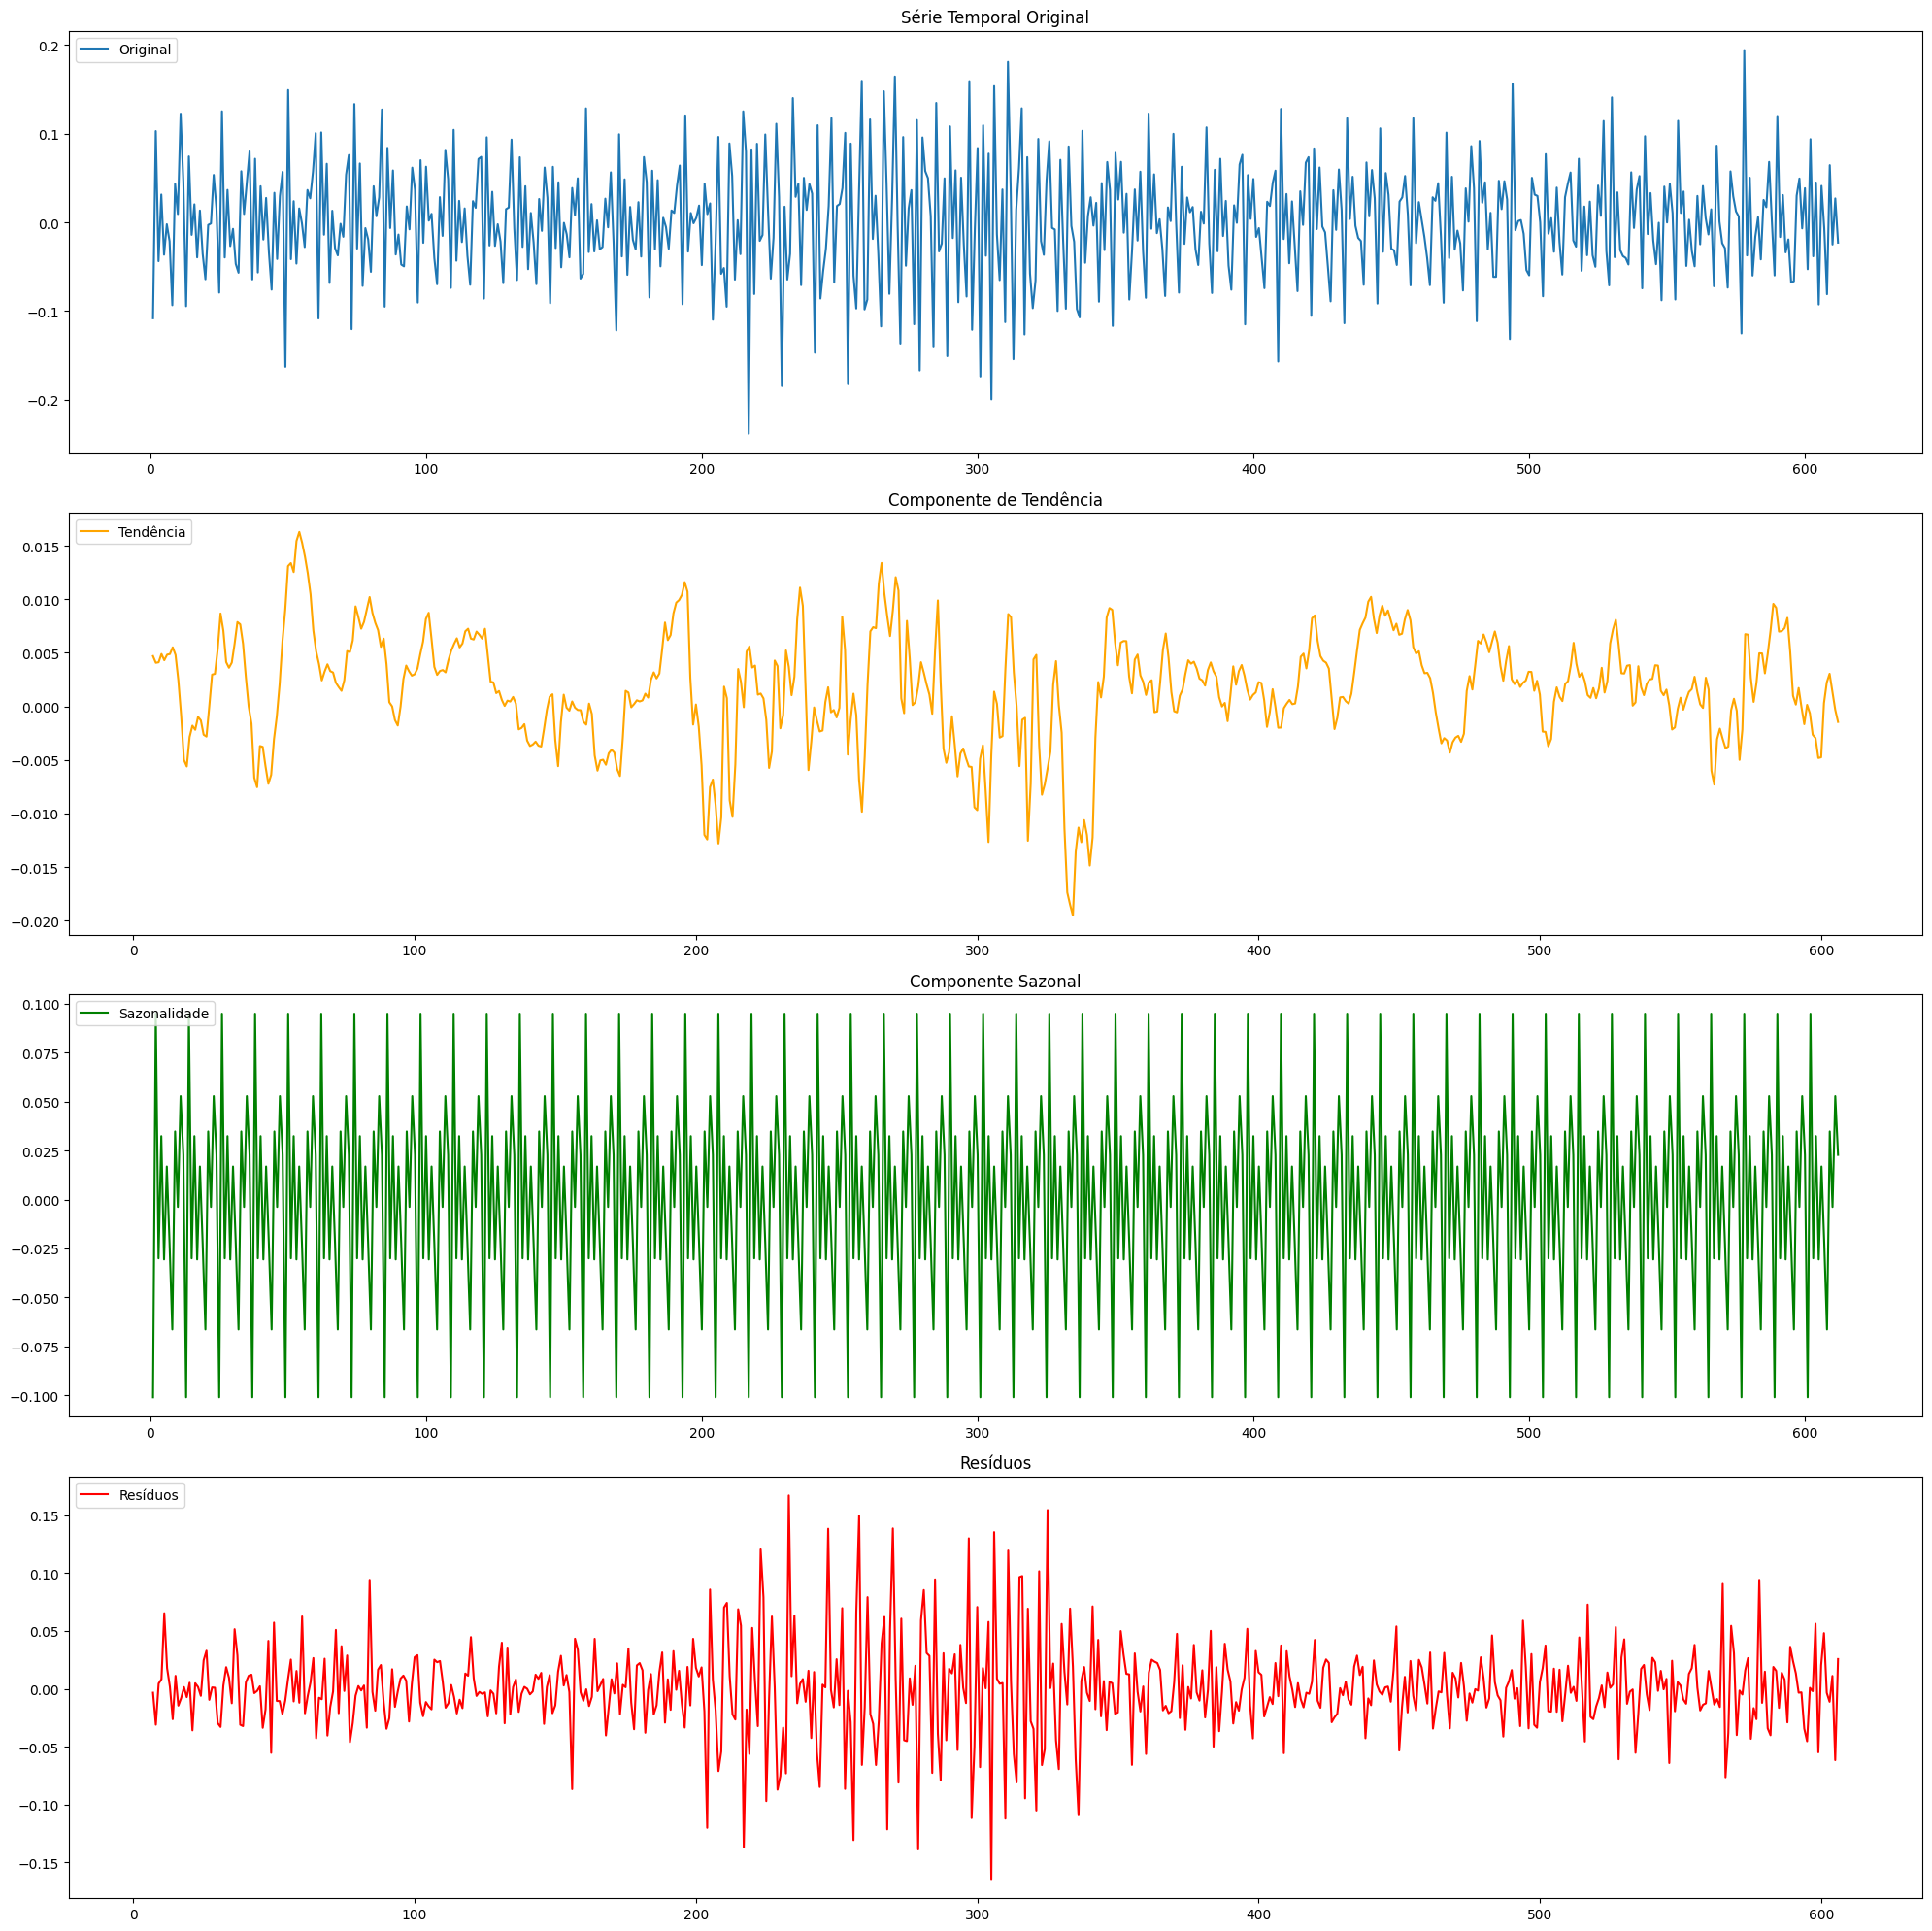

In [ ]:

# Decompondo a série temporal
decomposicao = seasonal_decompose(data_diff1, model='additive', period=12)  # 'period=12' para sazonalidade anual

# Plotando os componentes
plt.figure(figsize=(20, 20))

plt.subplot(411)
plt.plot(data_diff1, label='Original')
plt.legend(loc='upper left')
plt.title('Série Temporal Original')

plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência', color='orange')
plt.legend(loc='upper left')
plt.title('Componente de Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal, label='Sazonalidade', color='green')
plt.legend(loc='upper left')
plt.title('Componente Sazonal')

plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos', color='red')
plt.legend(loc='upper left')
plt.title('Resíduos')

plt.tight_layout()
plt.show()

In [ ]:
# from sklearn.model_selection import TimeSeriesSplit
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import numpy as np

# y = np.array(data_scaled_df)
# tscv = TimeSeriesSplit(n_splits=5)
# for train_index, test_index in tscv.split(y):
#     y_train, y_test = y[train_index], y[test_index]
    
#     # Defina e ajuste o modelo SARIMA
#     model = SARIMAX(y_train, order=(0, 0, 2), seasonal_order=(2, 0, 1, 12))  # Defina os parâmetros corretos
#     results = model.fit()
    
#     # Faça previsões
#     y_pred = results.predict(start=test_index[0], end=test_index[-1])
    
#     # Avalie o modelo (por exemplo, usando RMSE)
#     rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
#     print(f'RMSE: {rmse}')


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-1711.890, Time=0.82 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-1247.047, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-1583.481, Time=0.23 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-1500.378, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-1248.847, Time=0.00 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-1505.943, Time=0.73 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-1618.964, Time=0.72 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=-1708.480, Time=1.83 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=-1709.186, Time=1.76 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-1381.799, Time=0.37 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=-1563.199, Time=1.64 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=-1674.917, Time=1.73 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=-1716.439, Time=1.95 sec
 ARIMA(1,0,2)(2,0,2)[12] intercept   : AIC=-1718.260, Time=2.01 sec
 ARIM

C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


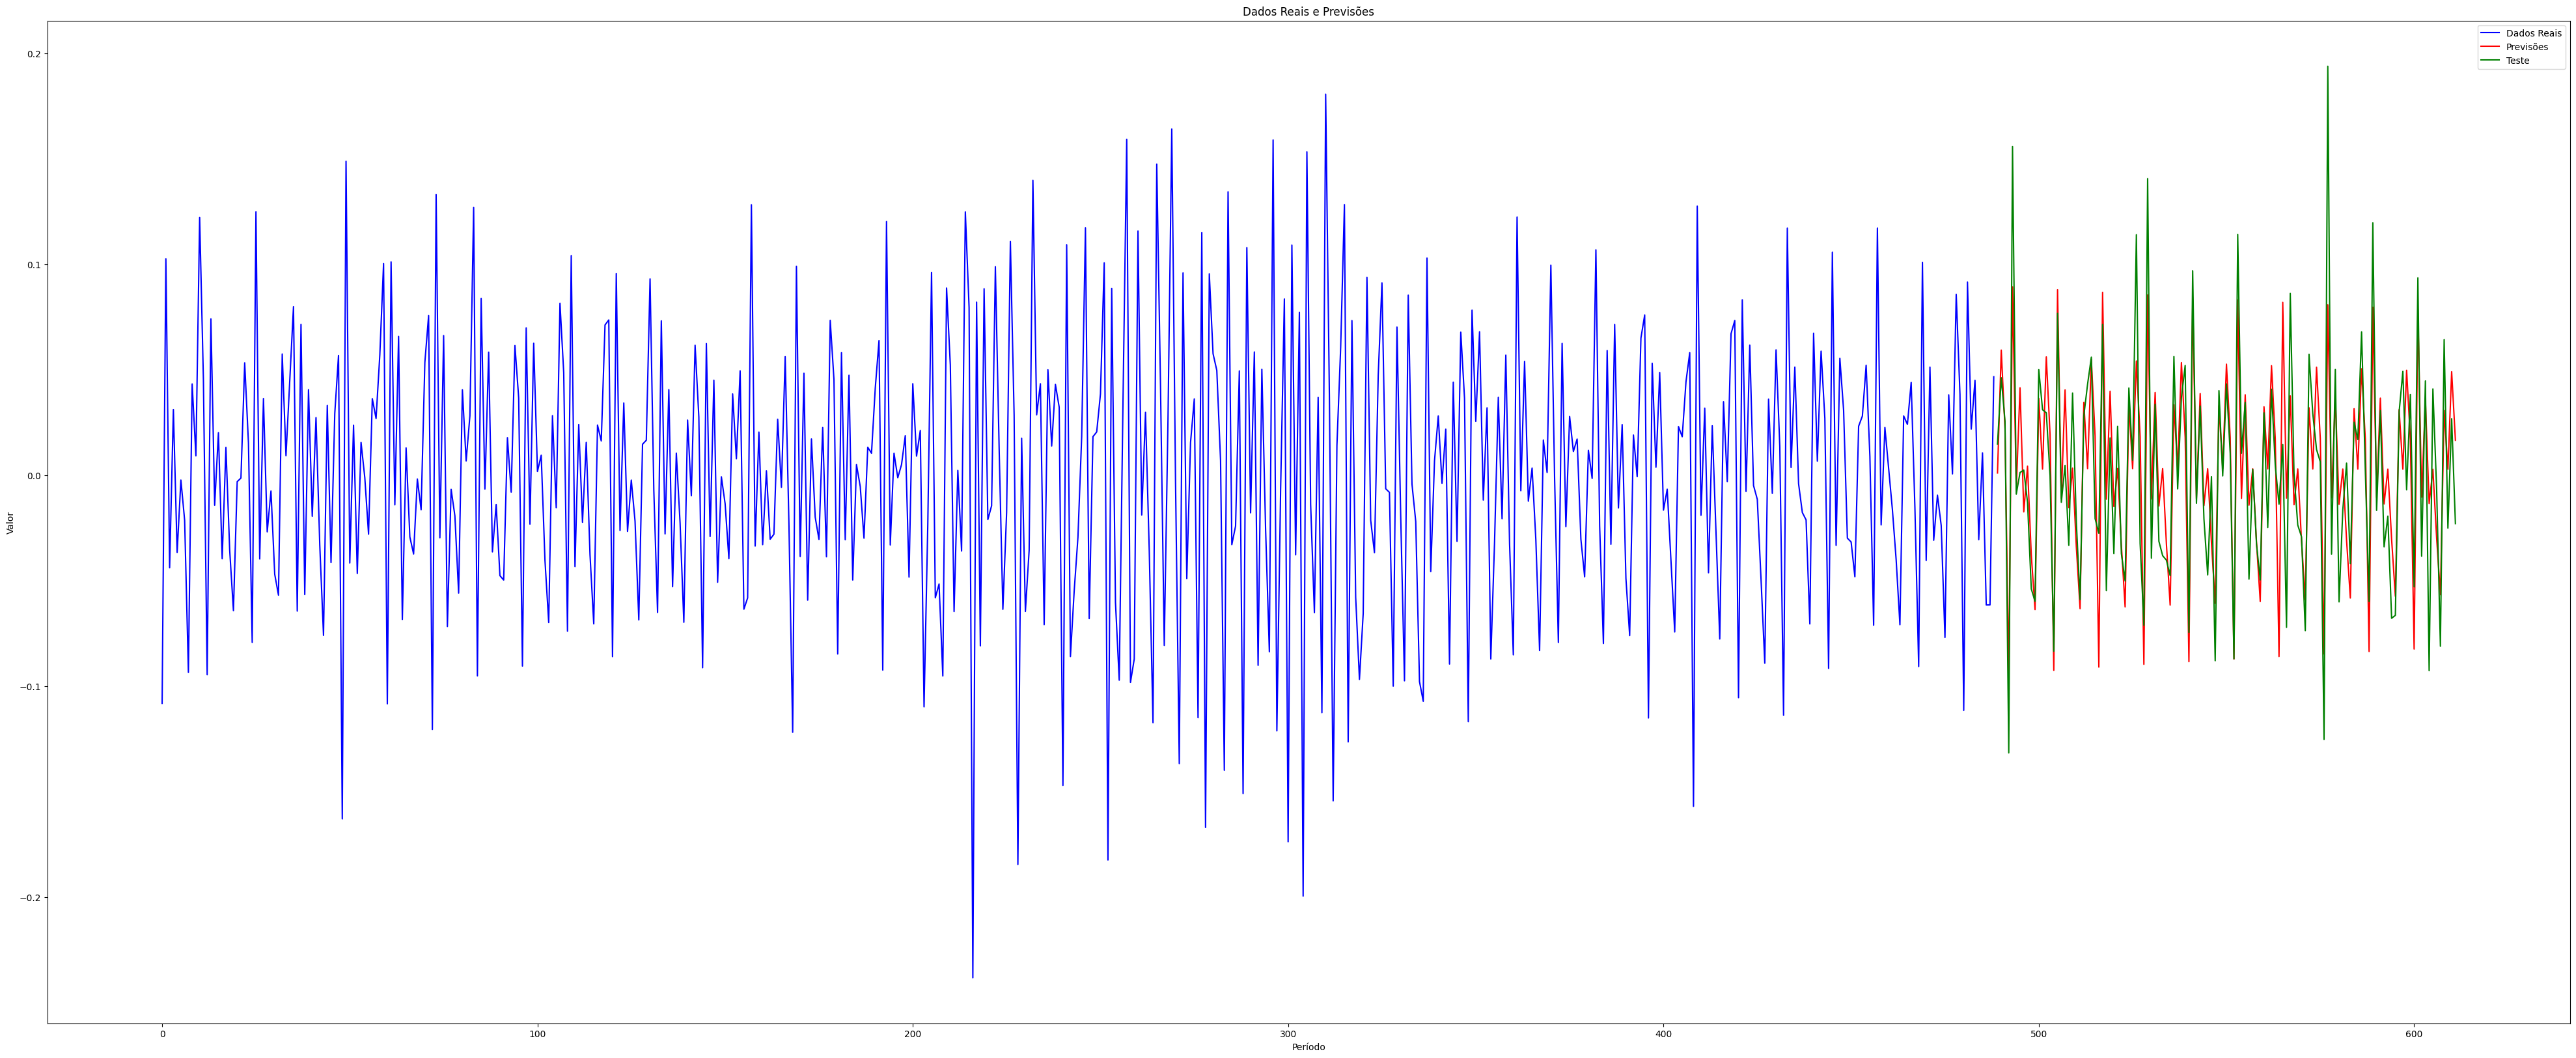

In [ ]:
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error

# Divida os dados em conjunto de treinamento e teste
train, test = model_selection.train_test_split(data_diff1, test_size=0.2)

# Ajuste o modelo ARIMA automaticamente
modelo_arima = pm.auto_arima(train, 
                             seasonal=True, # Use sazonalidade
                             m=12, # O valor 's' que representa a sazonalidade (por exemplo, 12 para dados mensais)
                             trace=True, # Para imprimir o progresso do ajuste
                             error_action='ignore', # Ignorar erros para continuar o processo
                             suppress_warnings=True, # Suprimir avisos
                             stepwise=True) # Usar algoritmo stepwise para encontrar os melhores parâmetros

# Resumo do modelo
print(modelo_arima.summary())

# Faça previsões com o modelo ajustado
previsoes = modelo_arima.predict(n_periods=len(test))

# Combine os dados reais e as previsões em um único array para plotar
dados_completos = np.concatenate([train])
indice_tempo = np.arange(len(dados_completos))
indice_previsoes = np.arange(len(train), len(train) + len(previsoes))

# Plotar os dados reais (azul) e as previsões (vermelho)
plt.figure(figsize=(50, 20))
plt.plot(indice_tempo, dados_completos, label='Dados Reais', color='blue')
plt.plot(indice_previsoes, previsoes, label='Previsões', color='red')
plt.plot(indice_previsoes, test, label='Teste', color='green')

plt.xlabel('Período')
plt.ylabel('Valor')
plt.legend()
plt.title('Dados Reais e Previsões')
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-1711.890, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-1247.047, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-1583.481, Time=0.28 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-1500.378, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-1248.847, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-1505.943, Time=0.71 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-1618.964, Time=0.69 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=-1708.480, Time=1.77 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=-1709.186, Time=1.84 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-1381.799, Time=0.32 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=-1563.199, Time=1.68 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=-1674.917, Time=1.79 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=-1716.439, Time=2.06 sec
 ARIMA(1,0,2)(2,0,2)[12] intercept   : AIC=-1718.260, Time=2.21 sec
 ARIM

C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


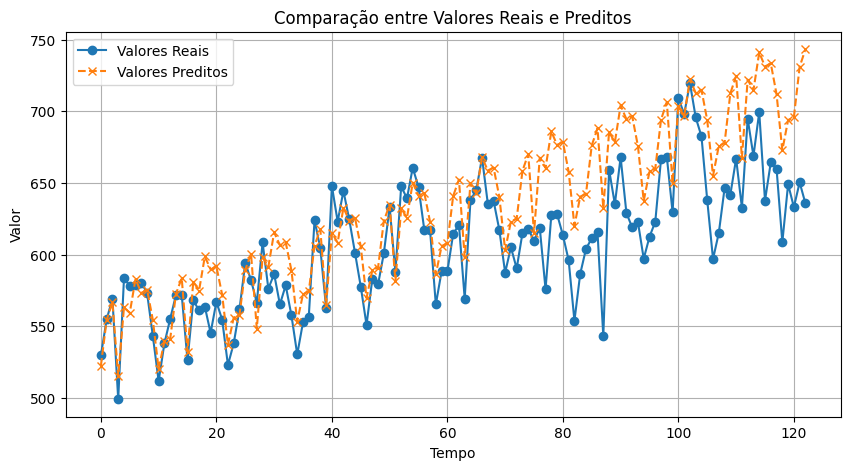

In [ ]:
# Suponha que 'data' seja sua série temporal em um DataFrame
# Ajuste do modelo SARIMA
train, test = model_selection.train_test_split(data_diff1, test_size=0.2)
modelo_sarima = pm.auto_arima(train, 
                              seasonal=True, m=12, 
                              trace=True, 
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)

# Resumo do modelo SARIMA
print(modelo_sarima.summary())

# Faça previsões com o modelo ajustado
previsoes_sarima = modelo_sarima.predict(n_periods=len(test))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics.pairwise import cosine_similarity

# Pegando o último valor antes da diferenciação
data_log = np.array(log_data)
last_value_log = data_log[-1]

# Para reverter a diferenciação
series_reverted_log = np.concatenate(([last_value_log], last_value_log + np.cumsum(data_diff1)))

# Revertendo a transformação logarítmica
y_true_differenced = np.array(test)
y_pred_differenced = np.array(previsoes)

y_true_log = [last_value_log]
y_pred_log = [last_value_log]

for i in range(len(y_true_differenced)):
    y_true_log.append(y_true_log[-1] + y_true_differenced[i])
    y_pred_log.append(y_pred_log[-1] + y_pred_differenced[i])

y_true_log = np.array(y_true_log[1:])
y_pred_log = np.array(y_pred_log[1:])

# Aplicando a reversão da transformação logarítmica
y_true = np.exp(y_true_log)
y_pred = np.exp(y_pred_log)

# Calcular R^2
r2 = r2_score(y_true, y_pred)
print(f'R^2: {r2}')

# Calcular RMSE
rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
print(f'RMSE: {rmse}')

# Calcular Similaridade de Cosseno
y_true_reshaped = y_true.reshape(1, -1)
y_pred_reshaped = y_pred.reshape(1, -1)
cosine_sim = cosine_similarity(y_true_reshaped, y_pred_reshaped)[0][0]
print(f'Similaridade de Cosseno: {cosine_sim}')

# Plotando o gráfico
plt.figure(figsize=(10, 5))
plt.plot(y_true, label='Valores Reais', linestyle='-', marker='o')
plt.plot(y_pred, label='Valores Preditos', linestyle='--', marker='x')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title('Comparação entre Valores Reais e Preditos')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# # Suponha que 'data' seja sua série temporal em um DataFrame
# # Ajuste do modelo SARIMA
# train_sarima, test_sarima = model_selection.train_test_split(data_diff1, test_size=0.2)
# modelo_sarima = pm.auto_arima(train_sarima, 
#                               seasonal=True, m=12, 
#                               trace=True, 
#                               error_action='ignore',
#                               suppress_warnings=True,
#                               stepwise=True)

# # Ajustando o modelo ARIMA nos dados de treino
# p, d, q = 2, 0, 4  # Substitua pelos valores apropriados para o seu modelo
# arima_model3 = sm.tsa.ARIMA(train_data_scaler_df, order=(p, d, q))
# arima_result3 = arima_model3.fit()

# print(arima_result3.summary())
# arima_resid3 = arima_result3.resid
# # model_garch3 = arch_model(arima_resid3, vol='GARCH', p=1,q=1)

# # garch_result3 = model_garch3.fit()

# # Para reverter a diferenciação
# series_reverted = np.concatenate(([last_value_log], last_value_log + np.cumsum(data_diff1)))
# print(f"Série revertida: {series_reverted}")

# # # Prevendo a volatilidade condicional com o modelo GARCH
# # garch_forecast = garch_result3.forecast(horizon=forecast_steps)
# # garch_forecast_variance = garch_forecast.variance.values[-1, :]

# pd.set_option('display.max_rows',df.shape[0])
# pd.set_option('display.max_columns', df.shape[1])

# for i in range(len(y_true_differenced)):
#     y_true_log.append(y_true_log[-1] + y_true_differenced[i])
#     y_pred_log.append(y_pred_log[-1] + y_pred_differenced[i])

# y_true_log = np.array(y_true_log[1:])
# y_pred_log = np.array(y_pred_log[1:])

# # Gráfico das Previsões
# plt.figure(figsize=(30, 20))
# plt.plot(np.arange(len(train_data_scaled)), scaler.inverse_transform(train_data_scaled.reshape(-1, 1)).flatten(), label='Dados de Treino')
# plt.plot(np.arange(len(train_data_scaled), len(train_data_scaled) + len(test_data_scaled)), scaler.inverse_transform(test_data_scaled.reshape(-1, 1)).flatten(), label='Dados de Teste')
# plt.plot(np.arange(len(train_data_scaled), len(train_data_scaled) + len(test_data_scaled)), forecast_rescaled, label='Previsões ARIMA', color='red')
# # plt.fill_between(np.arange(len(train_data_scaled),len(train_data_scaled) + len(test_data_scaled)),arima_forecast - 2 * np.sqrt(garch_forecast_variance), arima_forecast + 2 *np.sqrt(garch_forecast_variance), color='lightgray',alpha=0.5,label='Intervalo de Confiança')
# plt.legend()
# plt.title('Previsões ARIMA nos Dados Padronizados')
# plt.show()


In [ ]:
# # Ajuste o modelo ARIMA automaticamente
# modelo_arima = pm.auto_arima(train_data_scaler_df, 
#                              seasonal=True, # Use sazonalidade
#                              m=12, # O valor 's' que representa a sazonalidade (por exemplo, 12 para dados mensais)
#                              trace=True, # Para imprimir o progresso do ajuste
#                              error_action='ignore', # Ignorar erros para continuar o processo
#                              suppress_warnings=True, # Suprimir avisos
#                              stepwise=True) # Usar algoritmo stepwise para encontrar os melhores parâmetros

# # Resumo do modelo
# print(modelo_arima.summary())

# # Faça previsões com o modelo ajustado
# previsoes = modelo_arima.predict(n_periods=len(test_data_scaler_df))

# print(previsoes)
# # Combine os dados reais e as previsões em um único array para plotar
# dados_completos = np.concatenate([train_data_scaler_df, test_data_scaler_df])
# indice_tempo = np.arange(len(dados_completos))
# indice_previsoes = np.arange(len(train_data_scaler_df) + len(test_data_scaler_df), len(train_data_scaler_df) + len(test_data_scaler_df) + len(previsoes))

# # Plotar os dados reais (azul) e as previsões (vermelho)
# plt.figure(figsize=(50, 20))
# plt.plot(indice_tempo, dados_completos, label='Dados Reais', color='blue')
# plt.plot(indice_previsoes, previsoes, label='Previsões', color='red')

# plt.xlabel('Período')
# plt.ylabel('Valor')
# plt.legend()
# plt.title('Dados Reais e Previsões')
# plt.show()

In [ ]:
# import pmdarima as pm
# from pmdarima import model_selection
# from sklearn.metrics import mean_squared_error

# # Divida os dados em conjunto de treinamento e teste
# train, test = model_selection.train_test_split(data_scaled_df, test_size=0.2)

# # Ajuste o modelo ARIMA automaticamente
# modelo_arima = pm.auto_arima(train, 
#                              seasonal=True, # Use sazonalidade
#                              m=12, # O valor 's' que representa a sazonalidade (por exemplo, 12 para dados mensais)
#                              trace=True, # Para imprimir o progresso do ajuste
#                              error_action='ignore', # Ignorar erros para continuar o processo
#                              suppress_warnings=True, # Suprimir avisos
#                              stepwise=True) # Usar algoritmo stepwise para encontrar os melhores parâmetros

# # Resumo do modelo
# print(modelo_arima.summary())

# # Faça previsões com o modelo ajustado
# previsoes = modelo_arima.predict(n_periods=len(test))

# print(previsoes)

# # Avaliar o desempenho do modelo
# print("Mean Squared Error:", mean_squared_error(test, previsoes))

# import matplotlib.pyplot as plt
# import numpy as np


In [ ]:
# # Combine os dados reais e as previsões em um único array para plotar
# dados_completos = np.concatenate([train])
# indice_tempo = np.arange(len(dados_completos))
# indice_previsoes = np.arange(len(train), len(train) + len(previsoes))

# # Plotar os dados reais (azul) e as previsões (vermelho)
# plt.figure(figsize=(50, 20))
# plt.plot(indice_tempo, dados_completos, label='Dados Reais', color='blue')
# plt.plot(indice_previsoes, previsoes, label='Previsões', color='red')
# plt.plot(indice_previsoes, test, label='Teste', color='green')

# plt.xlabel('Período')
# plt.ylabel('Valor')
# plt.legend()
# plt.title('Dados Reais e Previsões')
# plt.show()